**Name:** Yidu WU_

**EID:** yiduwu2

# CS5489 - Tutorial 3
## Gender Classification from Face Images

In this tutorial you will train a classifier to predict whether a face image is male or female.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import os
import zipfile
import fnmatch
random.seed(100)

## 1. Loading Data and Pre-processing
We first need to load the images.  Download `photos-bw.zip` and put it in the same directory as this ipynb file.  **Do not unzip the file.** Then run the following cell to load the images.

In [2]:
imgdata = []
genders = []

# load the zip file
filename = 'photos-bw.zip'
zfile = zipfile.ZipFile(filename, 'r')

for name in zfile.namelist():
    # check file name matches
    if fnmatch.fnmatch(name, "photos-bw/*.png"):
        print("loading", name)
        # open file in memory, and parse as an image
        myfile = zfile.open(name)
        img = matplotlib.image.imread(myfile)
        myfile.close()
        
        # append to data
        imgdata.append(img)
        genders.append( int(name[len("photos-bw/")] == 'm') )  # 0 is female, 1 is male
        
zfile.close()
imgsize = img.shape
print("DONE: loaded {} images".format(len(imgdata)))

loading photos-bw/f-039-01.png
loading photos-bw/f-040-01.png
loading photos-bw/f-041-01.png
loading photos-bw/f-042-01.png
loading photos-bw/f-043-01.png
loading photos-bw/f1-001-0.png
loading photos-bw/f1-002-0.png
loading photos-bw/f1-003-0.png
loading photos-bw/f1-004-0.png
loading photos-bw/f1-005-0.png
loading photos-bw/f1-006-0.png
loading photos-bw/f1-007-0.png
loading photos-bw/f1-008-0.png
loading photos-bw/f1-009-0.png
loading photos-bw/f1-010-0.png
loading photos-bw/f1-011-0.png
loading photos-bw/f1-012-0.png
loading photos-bw/f1-013-0.png
loading photos-bw/f1-014-0.png
loading photos-bw/f1-015-0.png
loading photos-bw/m-063-01.png
loading photos-bw/m-064-01.png
loading photos-bw/m-065-01.png
loading photos-bw/m-067-01.png
loading photos-bw/m-069-01.png
loading photos-bw/m-070-01.png
loading photos-bw/m-073-01.png
loading photos-bw/m-074-01.png
loading photos-bw/m-075-01.png
loading photos-bw/m-077-01.png
loading photos-bw/m-083-01.png
loading photos-bw/m-085-01.png
loading 

Each image is a 45x40 array of pixel values.  Run the below code to show an example:

(45, 40)


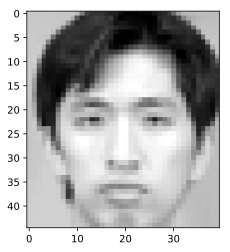

In [3]:
print(img.shape)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()

Run the below code to show all the images!

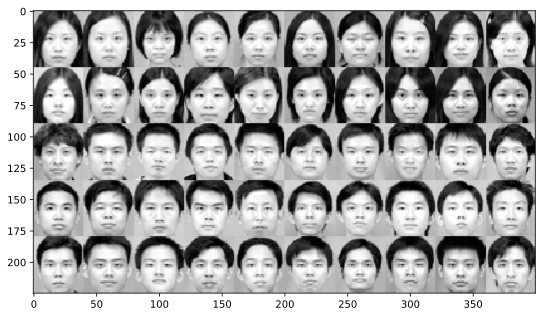

In [4]:
# function to make an image montage
def image_montage(X, imsize=None, maxw=10):
    """X can be a list of images, or a matrix of vectorized images.
      Specify imsize when X is a matrix."""
    tmp = []
    numimgs = len(X)
    
    # create a list of images (reshape if necessary)
    for i in range(0,numimgs):
        if imsize != None:
            tmp.append(X[i].reshape(imsize))
        else:
            tmp.append(X[i])
    
    # add blanks
    if (numimgs > maxw) and (mod(numimgs, maxw) > 0):
        leftover = maxw - mod(numimgs, maxw)
        meanimg = 0.5*(X[0].max()+X[0].min())
        for i in range(0,leftover):
            tmp.append(ones(tmp[0].shape)*meanimg)
    
    # make the montage
    tmp2 = []
    for i in range(0,len(tmp),maxw):
        tmp2.append( hstack(tmp[i:i+maxw]) )
    montimg = vstack(tmp2) 
    return montimg

plt.figure(figsize=(9,9))
plt.imshow(image_montage(imgdata), cmap='gray', interpolation='nearest')
plt.show()

Each image is a 2d array, but the classifier algorithms work on 1d vectors. Run the following code to convert all the images into 1d vectors by flattening.  The result should be a matrix where each row is a flattened image.

In [8]:
X = empty((50, prod(imgdata[0].shape))) # create empty array
for i,img in enumerate(imgdata):
    X[i,:] = ravel(img)           # for each image, turn it into a vector
Y = asarray(genders)  # convert list to numpy array
print(X.shape)
print(Y.shape)

(50, 1800)
(50,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Next we will shift the pixel values so that gray is 0.0, black is -0.5 and white is 0.5.

In [9]:
print("Before: min={}, max={}".format(X.min(), X.max()))
X -= 0.5
print("After:  min={}, max={}".format(X.min(), X.max()))

Before: min=0.0, max=1.0
After:  min=-0.5, max=0.5


Finally, split the dataset into a training set and testing set. We select 80% for training and 20% for testing.

In [10]:
# randomly split data into 80% train and 20% test set
trainX, testX, trainY, testY = \
  model_selection.train_test_split(X, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainX.shape)
print(testX.shape)

(40, 1800)
(10, 1800)


In [11]:
# compute the average image for later
avgX = mean(X,axis=0)

# 2. Logistic Regression
Train a logistic regression classifier.  Use cross-validation to select the best C parameter.

w= [[0.00035113 0.00040657 0.00049916 ... 0.01334931 0.01042594 0.01006051]]
b= [-0.07932328]
C = [0.01274275]


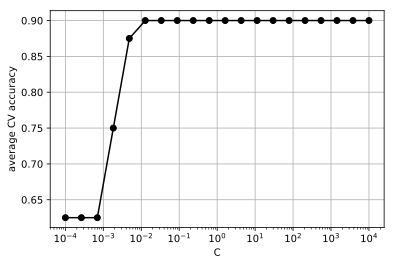

In [31]:
### INSERT YOUR CODE HERE
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
logreg.fit(trainX, trainY)

print("w=", logreg.coef_)
print("b=", logreg.intercept_)

print("C =", logreg.C_)
avgscores = mean(logreg.scores_[1],0)  #
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C'); plt.ylabel('average CV accuracy'); plt.grid(True);



Use the learned model to predict the genders for the training and testing data. What is the accuracy on the training set? What is the accuracy on the testing set?

In [37]:
### INSERT YOUR CODE HERE
predY = logreg.predict(trainX)

# calculate accuracy
acc = metrics.accuracy_score(trainY, predY)
print("Train accuracy=", acc)
predYtest = logreg.predict(testX)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)



Train accuracy= 0.9
test accuracy= 0.8


### Analyzing the classifier
Run the below code to show the hyperplane parameter $\mathbf{w}$ as an image.  

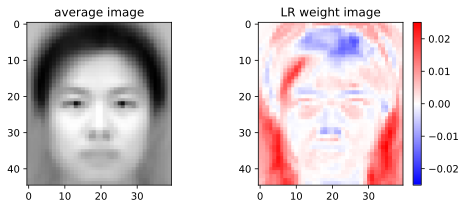

In [35]:
# logreg is the learned logistic regression model
wimg = logreg.coef_.reshape(imgsize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()

# Recall that the classifier prediction is based on the sign of the function $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}+b = \sum_{i=1}^P w_ix_i + b$.  Here each $x_i$ is a pixel in the face image, and $w_i$ is the corresponding weight.  Hence, the function is multiplying face image by the weight image, and then summing over all pixels.

In order for $f(\mathbf{x})$ to be positive, then the positive values of the weight image (red regions) should match the positive values in the face image (white pixels), and the negative values of the weight image (blue regions) should be matched with negative values in the face image (black pixels).

Hence, we can have the following interpretation:
<table>
<tr><th>Class</th><th>red regions (positive weights)</th><th>blue regions (negative weights)</th><th>white regions (weights near 0)</th></tr>
<tr><td>+1 class (male)</td><td>white pixels in face image</td><td>black pixels in face image</td><td>region not important</td></tr>
<tr><td>-1 class (female)</td><td>black pixels in face image</td><td>white pixels in face image</td><td>region not important</td></tr>
</table>
  
_Looking at the weight image, what parts of the face image is the classifier looking at to determine the gender?  Does it make sense?_

- **INSERT YOUR ANSWER HERE**
Mainly according to hairstyle contour and length.This may work in most cases, but there are many special cases

Now let's look at the misclassified faces in the test set.  Run the below code to show the misclassifed and correctly classified faces.

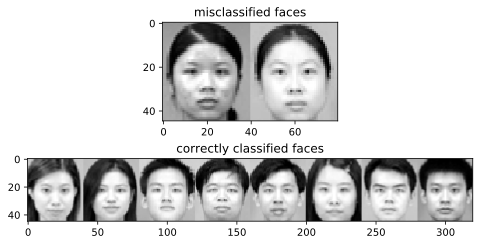

In [38]:
# predYtest are the class predictions on the test set.

# find misclassified test images
inds = where(predYtest != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)
    
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray', interpolation='nearest')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray', interpolation='nearest')
plt.title('correctly classified faces')
plt.show()

_Why did the classifier make incorrect predictions on the misclassified faces?_
- **INSERT YOUR ANSWER HERE**
Due to short hair and lack of distinctive features of long female hair

# 3. Support Vector Machine
Now train a support vector machine (SVM) on the same training and testing data.  Use cross-validation to select the best $C$ parameter.

{'C': array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03])}
Fitting 20 folds for each of 15 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 15 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


mean=0.7500 {'C': 0.001}
mean=0.8750 {'C': 0.0026826957952797246}
mean=0.9000 {'C': 0.0071968567300115215}
mean=0.9000 {'C': 0.019306977288832496}
mean=0.9000 {'C': 0.0517947467923121}
mean=0.9000 {'C': 0.13894954943731375}
mean=0.9000 {'C': 0.3727593720314938}
mean=0.9000 {'C': 1.0}
mean=0.9000 {'C': 2.6826957952797246}
mean=0.9000 {'C': 7.196856730011514}
mean=0.9000 {'C': 19.306977288832496}
mean=0.9000 {'C': 51.794746792312125}
mean=0.9000 {'C': 138.9495494373136}
mean=0.9000 {'C': 372.7593720314938}
mean=0.9000 {'C': 1000.0}
{'C': 0.0071968567300115215}
0.9
SVC(C=0.0071968567300115215, kernel='linear')


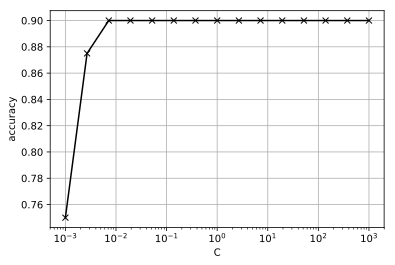

In [79]:
### INSERT YOUR CODE HERE
paramgrid = {'C': logspace(-3,3,15)}
print(paramgrid)
# setup the cross-validation object
# pass the SVM object, parameter grid, and number of CV folds
# set number of parallel jobs to -1 (use all cores)
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid, cv=20,
                                     n_jobs=-1, verbose=True)

# run cross-validation (train for each split)
svmcv.fit(trainX, trainY);
for m,p in zip(svmcv.cv_results_['mean_test_score'], svmcv.cv_results_['params']):
    print("mean={:.4f} {}".format(m,p))

allC      = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
    
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)

# view best results and best retrained estimator
print(svmcv.best_params_)
print(svmcv.best_score_)
print(svmcv.best_estimator_)



Calculate the training and test accuracy for the SVM classifier.

In [80]:
### INSERT YOUR CODE HERE
predYtest1 = svmcv.predict(testX)

acc = metrics.accuracy_score(testY, predYtest1)
print("test accuracy = " + str(acc))


test accuracy = 0.8


Similar to before, plot an image of the hyperplane parameters $w$, and view the misclassified and correctly classified test images.

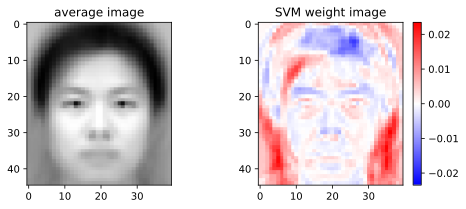

In [106]:
### INSERT YOUR CODE HERE
wimg = svmcv.best_estimator_.coef_[0].reshape(imgsize) 

mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('average image')
plt.imshow(avgX.reshape(imgsize), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("SVM weight image")
plt.show()

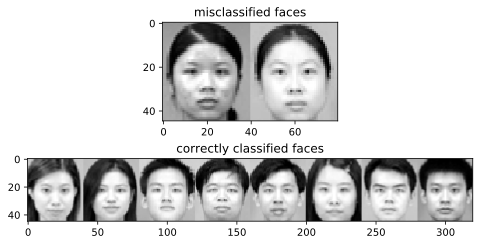

In [84]:
inds = where(predYtest1 != testY) # get indices of misclassified test images
# make a montage
badimgs = image_montage(testX[inds], imsize=imgsize)

# find correctly classified test images
inds = where(predYtest1 == testY)
goodimgs = image_montage(testX[inds], imsize=imgsize)
    
plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.imshow(badimgs, cmap='gray')
plt.title('misclassified faces')
plt.subplot(2,1,2)
plt.imshow(goodimgs, cmap='gray')
plt.title('correctly classified faces')
plt.show()

_Are there any differences between the $w$ for logistic regressiona and the $w$ for SVM?  Is there any interpretation for the differences?_

- **INSERT YOUR ANSWER HERE**
SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not

# 4. Classifying cropped faces
It seems that the hair around the face and forehead are discriminative enough to perform gender classifixation. Now try to perform the same task but only focusing on the face image, and not the hair.

First, we define a mask over the face.

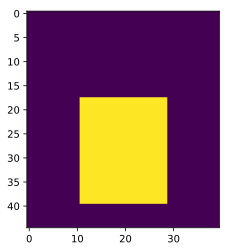

In [107]:
imgmask = full((img.shape), False)
#imgmask[17:41,8:32] = True
#masksize = (24,24)
imgmask[18:40,11:29] = True
masksize = (22,18)
plt.imshow(imgmask)

Next we crop out the face image to create the new inputs.  The vectors are now 576-dim, and corresponding images are 24x24.

In [108]:
Xm = X[:,imgmask.ravel()]
Xm.shape

(50, 396)

Here are the cropped images.

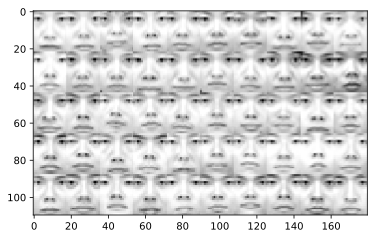

In [109]:
plt.imshow(image_montage(Xm, imsize=masksize), cmap='gray', interpolation='nearest')

Generate the same training/test split as before

In [110]:
# randomly split data into 80% train and 20% test set
trainXm, testXm, trainY, testY = \
  model_selection.train_test_split(Xm, Y, 
  train_size=0.80, test_size=0.20, random_state=4487)

print(trainXm.shape)
print(testXm.shape)

(40, 396)
(10, 396)


In [111]:
avgXm = avgX[imgmask.ravel()]

Now train logistic regression and SVM classifiers on the new cropped images.

w= [[ 3.69132860e-01 -1.62151985e-01 -5.86585814e-01 -6.69408128e-01
  -5.97059591e-01 -1.26159817e-01 -2.08780556e-01 -7.85405660e-03
   2.02009875e-01  9.07946903e-02  1.75222211e-01 -4.88766612e-02
   1.94379229e-01  1.19624210e-01  9.84082204e-02  2.17598734e-01
  -1.03635731e-01  2.06243643e-01 -6.93284331e-01 -1.20628490e+00
  -6.89496703e-01 -4.83746761e-01 -4.44667841e-01 -4.33035708e-01
  -7.85746768e-01 -5.29906104e-01 -2.58367653e-02  2.82062804e-02
  -2.40305073e-01 -6.25215410e-01 -6.10064067e-01 -7.03133255e-01
  -8.45500760e-01 -1.21652167e+00 -1.38842445e+00 -1.03926145e+00
  -3.42217496e-01 -3.26412412e-01 -1.31764726e-01 -2.65415529e-03
  -2.44905563e-02 -2.83712838e-01 -5.64402891e-01 -5.07190513e-01
  -2.39839009e-01 -1.81219881e-01 -4.39435013e-01 -6.23107747e-01
  -5.62435461e-01 -1.33391714e-01  1.15129742e-01  5.08058647e-02
   1.41594777e-02 -2.79631970e-01  1.06149344e+00  1.13726491e+00
   1.13455570e+00  6.40178291e-01  2.90631821e-01  1.14369196e-01
  -1.19

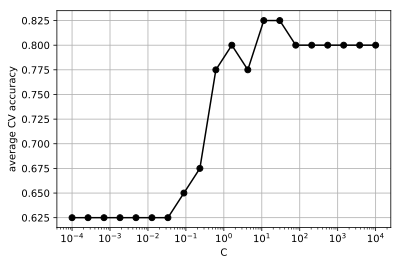

In [112]:
#logistic regression
logreg = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
logreg.fit(trainXm, trainY)

print("w=", logreg.coef_)
print("b=", logreg.intercept_)

print("C =", logreg.C_)
avgscores = mean(logreg.scores_[1],0)  #
plt.semilogx(logreg.Cs_, avgscores, 'ko-')
plt.xlabel('C'); plt.ylabel('average CV accuracy'); plt.grid(True);

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.3s finished


mean=0.6250 {'C': 0.0001}
mean=0.6250 {'C': 0.00026366508987303583}
mean=0.6250 {'C': 0.0006951927961775605}
mean=0.6250 {'C': 0.0018329807108324356}
mean=0.6250 {'C': 0.004832930238571752}
mean=0.6250 {'C': 0.012742749857031334}
mean=0.6250 {'C': 0.03359818286283781}
mean=0.6500 {'C': 0.08858667904100823}
mean=0.7750 {'C': 0.23357214690901212}
mean=0.7750 {'C': 0.615848211066026}
mean=0.7750 {'C': 1.623776739188721}
mean=0.7750 {'C': 4.281332398719396}
mean=0.7750 {'C': 11.288378916846883}
mean=0.7750 {'C': 29.763514416313132}
mean=0.7750 {'C': 78.47599703514607}
mean=0.7750 {'C': 206.913808111479}
mean=0.7750 {'C': 545.5594781168514}
mean=0.7750 {'C': 1438.44988828766}
mean=0.7750 {'C': 3792.690190732246}
mean=0.7750 {'C': 10000.0}
{'C': 0.23357214690901212}
0.775
SVC(C=0.23357214690901212, kernel='linear')


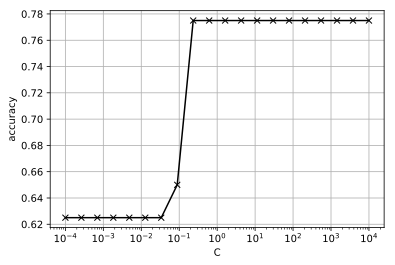

In [117]:
#SVM classifiers
paramgrid = {'C': logspace(-4,4,20)}
print(paramgrid)
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid, cv=10,
                                     n_jobs=-1, verbose=True)
svmcv.fit(trainXm, trainY);
for m,p in zip(svmcv.cv_results_['mean_test_score'], svmcv.cv_results_['params']):
    print("mean={:.4f} {}".format(m,p))

allC      = [p['C'] for p in svmcv.cv_results_['params']]
allscores = svmcv.cv_results_['mean_test_score']
    
plt.figure()
plt.semilogx(allC, allscores, 'kx-')
plt.xlabel('C'); plt.ylabel('accuracy')
plt.grid(True)
print(svmcv.best_params_)
print(svmcv.best_score_)
print(svmcv.best_estimator_)

Compute the train/test accuracies of the two classifiers.

In [113]:
#logistic regression
predY = logreg.predict(trainXm)
# calculate accuracy
acc = metrics.accuracy_score(trainY, predY)
print("Train accuracy=", acc)
predYtest = logreg.predict(testXm)
acc = metrics.accuracy_score(testY, predYtest)
print("test accuracy=", acc)

Train accuracy= 1.0
test accuracy= 0.8


In [118]:
#SVM classifiers
predY = svmcv.predict(trainXm)
acc = metrics.accuracy_score(trainY, predY)
print("Train accuracy=", acc)
predYtest1 = svmcv.predict(testXm)
acc = metrics.accuracy_score(testY, predYtest1)
print("test accuracy = " + str(acc))

Train accuracy= 0.925
test accuracy = 0.8


Compare the classification performance? Which performs better and why?

- **INSERT YOUR ANSWER HERE**
The logistic regression performs better for it's Train accuracy is very high.

Visualize the weights as an image and interpret what discriminative information each classifier is using.

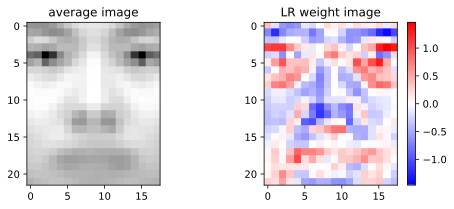

In [121]:
# logistic regression
wimg = logreg.coef_.reshape(masksize)      # get the w and reshape into an image
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('average image')
plt.imshow(avgXm.reshape(masksize), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("LR weight image")
plt.show()

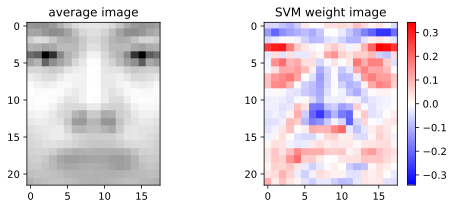

In [123]:
#SVM classifiers
wimg = svmcv.best_estimator_.coef_[0].reshape(masksize) 
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#FFFFFF", "#FF0000"])
mm = max(wimg.max(), -wimg.min())
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('average image')
plt.imshow(avgXm.reshape(masksize), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(wimg, interpolation='nearest', cmap=mycmap, vmin=-mm, vmax=mm)
plt.colorbar()
plt.title("SVM weight image")
plt.show()

- **INSERT YOUR ANSWER HERE**
logistic regression'discriminative information is most focused on eyes,nose and mouth.Although the same is true of SVM, its weight is significantly lower